In [1]:
import pandas as pd

In [2]:
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

In [3]:
sthlm_raw = pd.read_csv("https://raw.githubusercontent.com/NilsSkoglund/ki_workshop_public/main/sthlm_raw.csv")
sthlm_clean = pd.read_csv("https://raw.githubusercontent.com/NilsSkoglund/ki_workshop_public/main/sthlm_clean.csv")
clinical = pd.read_csv("https://raw.githubusercontent.com/NilsSkoglund/ki_workshop_public/main/clinical.csv")
olink = pd.read_csv("https://raw.githubusercontent.com/NilsSkoglund/ki_workshop_public/main/olink.csv")

In [5]:
type(sthlm_clean)

pandas.core.frame.DataFrame

In [6]:
sthlm_clean.head()

,address,area,sqm,rooms,broker,monthly_fee,price_sek,date,pct_change,street_id,street_name,municipality,sek_sqm,yr_sold,mo_sold,mo_yr_sold
0,"Gamla Brogatan 25, 2tr","Vasastan - City/Norrmalm,",114.0,3.5,Fastighetsbyrån Stockholm - Vasastan,6769.0,7600000,2018-04-13,-5,475079,Gamla Brogatan,Stockholms kommun,66666,2018,4,2018-04-01
1,"Gamla Brogatan 25, 2 tr","Vasastan- City/ Norrmalm,",71.0,2.0,Mäklarhuset Stockholm Innerstan,4696.0,5050000,2016-06-23,4,475079,Gamla Brogatan,Stockholms kommun,71126,2016,6,2016-06-01
2,Gamla Brogatan 25,"Vasastan- City/ Norrmalm,",102.0,4.0,Mäklarhuset Stockholm Innerstan,6519.0,6950000,2016-04-29,1,475079,Gamla Brogatan,Stockholms kommun,68137,2016,4,2016-04-01
3,"Gamla Brogatan 25, 2tr","Vasastan - City/Norrmalm,",107.0,4.0,Fastighetsbyrån Stockholm - Vasastan,6713.0,7150000,2015-11-26,2,475079,Gamla Brogatan,Stockholms kommun,66822,2015,11,2015-11-01
4,"Drottninggatan 114 A, 3 tr","Vasastan - Norrmalm,",90.0,3.0,Bostadsrättsspecialisten,3822.0,8900000,2020-08-13,0,475084,Drottninggatan,Stockholms kommun,98888,2020,8,2020-08-01


## Basic EDA

EDA = Exploratory Data Analysis

"a method used to analyze and summarize data sets"

[read more](https://www.ibm.com/cloud/learn/exploratory-data-analysis#:~:text=Exploratory%20data%20analysis%20(EDA)%20is,often%20employing%20data%20visualization%20methods.&text=It%20can%20also%20help%20determine,for%20data%20analysis%20are%20appropriate.)

In [7]:
sthlm_clean.groupby("yr_sold")["sek_sqm"].mean()

yr_sold
2013    62740.628973
2014    70479.417650
2015    82966.397904
2016    88204.646495
2017    91145.249328
2018    85985.604932
2019    88566.538845
2020    92727.549486
Name: sek_sqm, dtype: float64

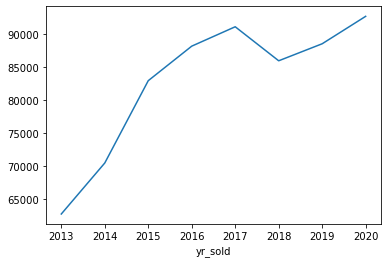

In [8]:
sthlm_clean.groupby("yr_sold")["sek_sqm"].mean().plot()

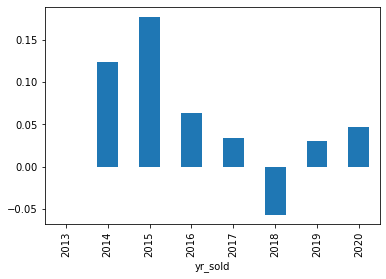

In [11]:
sthlm_clean.groupby("yr_sold")["sek_sqm"].mean().pct_change().plot(kind = "bar")

## Introducing MGH data

[Olink MGH Intro](https://www.olink.com/mgh-covid-study/)

[Olink MGH Overview](https://info.olink.com/mgh-covid-study-overview-page)
- ~384 patients
- Protein data from Olink
- Clinical data

[Published Article](https://www.cell.com/action/showPdf?pii=S2666-3791%2821%2900115-4)

## Clinical data | First inspection

In [13]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       384 non-null    int64  
 1   COVID            384 non-null    int64  
 2   Age cat          384 non-null    int64  
 3   BMI cat          384 non-null    int64  
 4   HEART            384 non-null    int64  
 5   LUNG             384 non-null    int64  
 6   KIDNEY           384 non-null    int64  
 7   DIABETES         384 non-null    int64  
 8   HTN              384 non-null    int64  
 9   IMMUNO           384 non-null    int64  
 10  Resp_Symp        384 non-null    int64  
 11  Fever_Sympt      384 non-null    int64  
 12  GI_Symp          384 non-null    int64  
 13  WHO 0            384 non-null    int64  
 14  WHO 3            384 non-null    int64  
 15  WHO 7            384 non-null    int64  
 16  WHO 28           384 non-null    int64  
 17  WHO max         

In [16]:
clinical.head(3)

,subject_id,COVID,Age cat,BMI cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat,Severity
0,1,1,1,4,0,0,0,0,0,0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-severe
1,2,1,2,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-severe
2,3,1,3,4,0,1,0,0,0,0,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-severe


In [15]:
clinical.size

15744

### Heatmap of correlations

In [17]:
clinical.corr()

,subject_id,COVID,Age cat,BMI cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,crp_3_cat,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat
subject_id,1.000000,0.015351,0.036063,-0.101286,-0.008801,0.097148,0.016387,-0.019752,0.047622,-0.031753,...,-0.007025,0.062715,-0.016332,-0.045895,-0.039668,-0.094176,-0.082829,0.022655,-0.087935,-0.052894
COVID,0.015351,1.000000,-0.128578,0.170967,-0.143026,-0.267415,-0.134743,0.003157,-0.162940,-0.175632,...,0.088151,0.110392,0.180513,-0.014362,-0.118126,-0.076660,-0.161420,0.084679,0.077838,0.161656
Age cat,0.036063,-0.128578,1.000000,-0.293622,0.319908,0.168288,0.329035,0.178045,0.482098,0.102562,...,0.033935,0.133494,-0.153508,0.095160,-0.229899,-0.133656,0.103075,0.147968,0.088386,-0.090736
BMI cat,-0.101286,0.170967,-0.293622,1.000000,-0.087619,-0.120519,-0.112929,0.025426,-0.096778,-0.175039,...,0.032374,-0.218406,-0.006522,-0.008861,0.019185,0.130672,-0.062397,0.025868,-0.150349,0.016407
HEART,-0.008801,-0.143026,0.319908,-0.087619,1.000000,0.276119,0.325208,0.185641,0.324964,0.048023,...,-0.081699,-0.012212,-0.072384,0.030650,-0.028912,0.076660,0.008991,0.058991,-0.034292,-0.052587
LUNG,0.097148,-0.267415,0.168288,-0.120519,0.276119,1.000000,0.114128,0.044004,0.140692,0.007582,...,-0.258117,-0.192375,-0.225605,0.006787,0.013196,0.061248,0.030501,-0.003095,-0.200818,-0.132021
KIDNEY,0.016387,-0.134743,0.329035,-0.112929,0.325208,0.114128,1.000000,0.161871,0.290688,0.075967,...,0.053635,0.044058,-0.056868,-0.037930,-0.246366,-0.135771,0.456017,0.056432,0.046493,-0.157354
DIABETES,-0.019752,0.003157,0.178045,0.025426,0.185641,0.044004,0.161871,1.000000,0.346672,0.013835,...,0.122917,0.128161,0.045911,0.131624,0.061510,0.239585,0.273049,0.125154,0.132350,-0.067249
HTN,0.047622,-0.162940,0.482098,-0.096778,0.324964,0.140692,0.290688,0.346672,1.000000,0.037311,...,0.030369,0.038868,-0.130624,0.090495,-0.016013,-0.016663,0.258759,0.143587,0.003935,0.024108
IMMUNO,-0.031753,-0.175632,0.102562,-0.175039,0.048023,0.007582,0.075967,0.013835,0.037311,1.000000,...,0.022907,0.101805,-0.106938,0.096372,-0.108369,0.064621,0.009626,-0.064749,0.032918,-0.143122


In [18]:
import seaborn as sns

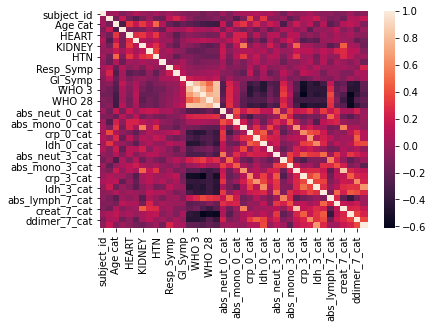

In [19]:
sns.heatmap(clinical.corr())

In [20]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Hello')

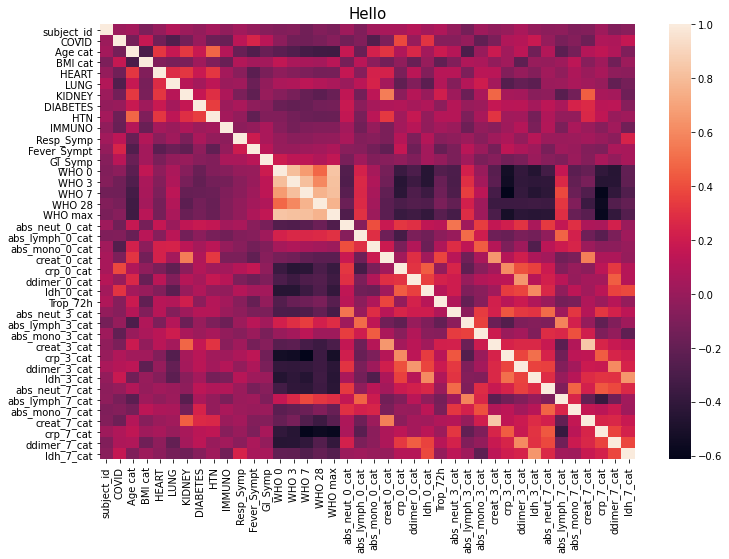

In [21]:
plt.figure(figsize = (12, 8))
sns.heatmap(clinical.corr())
plt.title("Hello", fontsize = 15)

### Better looking heatmap | Copy & Paste!

google seaborn > gallery > heatmap at 4th row

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [23]:
import numpy as np

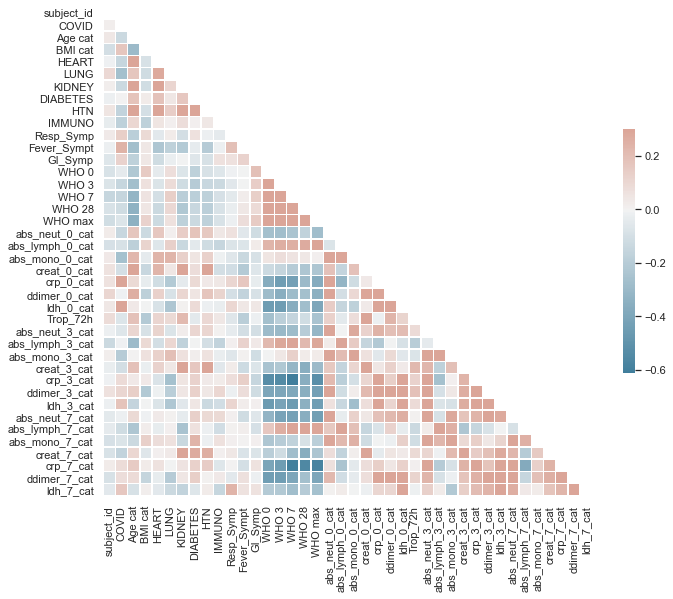

In [25]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = clinical.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Olink data | First inspection!

In [28]:
olink = olink[["SampleID", "UniProt", "NPX"]]

In [29]:
olink

,SampleID,UniProt,NPX
0,1_D0,Q9BTE6,3.2277
1,1_D0,Q96IU4,0.7205
2,1_D0,P00519,2.6293
3,1_D0,P09110,3.2670
4,1_D0,P16112,2.0308
...,...,...,...
1113275,99_D3,O43895,2.5027
1113276,99_D3,P07947,3.7681
1113277,99_D3,Q7Z739,0.9126
1113278,99_D3,Q05516,1.8974


In [30]:
# reshaping

In [32]:
example = olink.loc[olink["SampleID"] == "1_D0"]

In [33]:
example

,SampleID,UniProt,NPX
0,1_D0,Q9BTE6,3.2277
1,1_D0,Q96IU4,0.7205
2,1_D0,P00519,2.6293
3,1_D0,P09110,3.2670
4,1_D0,P16112,2.0308
...,...,...,...
1415,1_D0,O43895,4.8863
1416,1_D0,P07947,4.9975
1417,1_D0,Q7Z739,0.9208
1418,1_D0,Q05516,1.2148


In [36]:
olink_reshaped = olink.pivot_table(columns = "UniProt", index = "SampleID", values = "NPX")

### Preprocessing

In [37]:
# imputing

In [38]:
from sklearn.impute import SimpleImputer

In [39]:
imputer = SimpleImputer(strategy="mean")

In [40]:
imputer.fit_transform(olink_reshaped)

array([[ 2.6983, -1.4931,  4.5123, ...,  4.3084,  5.2035,  0.2769],
       [ 2.7147, -1.2593,  4.3638, ...,  4.2696,  5.3624,  0.5369],
       [ 2.9594, -0.9196,  4.5424, ...,  3.7724,  4.3914,  0.7175],
       ...,
       [ 2.5634, -1.393 ,  4.5873, ...,  3.8674,  6.2017,  0.3102],
       [ 2.1008, -0.769 ,  4.2444, ...,  3.7239,  6.7406,  1.4058],
       [ 2.2677, -1.2132,  4.1549, ...,  3.5847,  6.1171,  1.5215]])

In [41]:
olink_reshaped[:] = imputer.fit_transform(olink_reshaped)

In [42]:
# scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [46]:
olink_reshaped[:] = scaler.fit_transform(olink_reshaped)

In [ ]:
# Last preprocessing step!: 
    # truncating z-scores at +-4 (sort of following the study)

In [47]:
def trunc_4(x):
    if x > 4:
        return 4
    elif x < -4:
        return -4
    else:
        return x

In [49]:
olink_reshaped = olink_reshaped.applymap(trunc_4)

In [50]:
# We are now happy with our reshaping & preprocessing

In [52]:
olink_reshaped.to_csv("olink_reshaped.csv")